(highest-order-solvers)=
# 8.5. Higher Order Methods to solve ODEs

The Forward Euler method is a first-order method, meaning that the global error is on the order of the step size to the first power: error $\sim \mathcal{O}(\Delta t)$. We can do better than this and obtain higher-order methods. 

**Note** The detailed derivation of higher-order methods will be covered in the next lecture. Here, we will just take a look into how to implement them.

Let's do another example:

$$
y^{\prime} = 8 e^{-t}(1+t) - 2y
$$

with the initial condition $y(0) = 1$, and the domain $0 \leq t \leq 7$. This is a linear 1st-order ODE that we can find the analytical solution for comparison:

$$
y(t) = e^{-2t} (8 t e^t + 1)
$$

To solve, we'll create an function for the derivative and then incorporate that into our Forward Euler code. We'll start with $\Delta t = 0.2$.

In [4]:
import Pkg
using Plots
Pkg.instantiate()

In [5]:
# define the derivative function 
function dydt(t, y)
    return 8 * exp(-t) * (1 + t) - 2 * y
end

# Define the exact solution
function exact_solution(t)
    return exp(-2 * t) * (8 * t * exp(t) + 1)
end

# we'll create a simple function to do forward Euler
function forward_euler(t_end, y0, dt, f)
    # Simple function to perform Forward Euler iteration
    time = 0:dt:t_end
    y = zeros(length(time))
    y[1] = y0
    for idx in 1:length(time)-1
        y[idx+1] = y[idx] + f(time[idx], y[idx]) * dt
    end
    return time, y
end

forward_euler (generic function with 1 method)

Maximum error: 0.26860381419195667


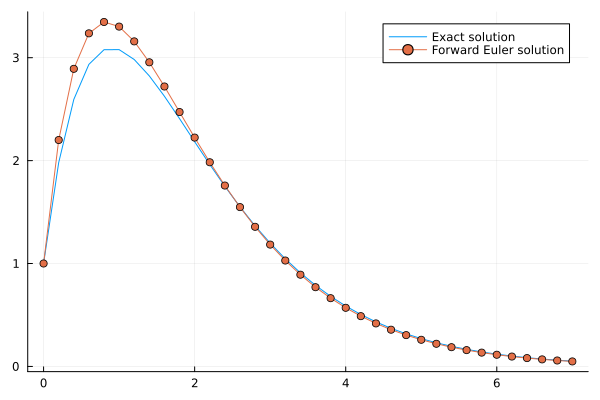

In [6]:
dt = 0.2
t_end = 7
t_vals = 0:dt:7
y_vals = zeros(length(t_vals))

# initial condition
y0 = 1

# forward Euler loop
t_vals, y_vals = forward_euler(t_end, y0, dt, dydt)

# Calculate the maximum error
y_exact = exact_solution.(t_vals)

println("Maximum error: ", abs(maximum(y_exact) - maximum(y_vals)))

plot(t_vals, y_exact, label="Exact solution")
plot!(t_vals, y_vals, marker=:circle, label="Forward Euler solution")

## Heun's method

Heun's method is a **predictor-corrector** method; these work by *predicting* a solution at some intermediate location and then using that information to get a better overall answer at the next location (*correcting*). Heun's uses the Forward Euler method to predict the solution at $x_{i+1}$, then uses the average of the slopes at $y_i$ and the predicted $y_{i+1}$ to get a better overall answer for $y_{i+1}$.

$$
\begin{align}
\text{predictor: } y_{i+1}^p &= y_i + \Delta x f(x_i, y_i) \\
\text{corrector: } y_{i+1} &= y_i + \frac{\Delta x}{2} \left( f(x_i, y_i) + f(x_{i+1}, y_{i+1}^p) \right)
\end{align}
$$

Heun's method is second-order accurate, meaning the global error is $\mathcal{O}(\Delta x^2)$.

Let's see this method in action:


In [7]:
dt = 0.2
t_vals = 0:dt:7
y_vals = zeros(length(t_vals))

# initial condition
y_vals[1] = 1

1

### Task : Implement Heun's method

Maximum error: 0.04140975267037117


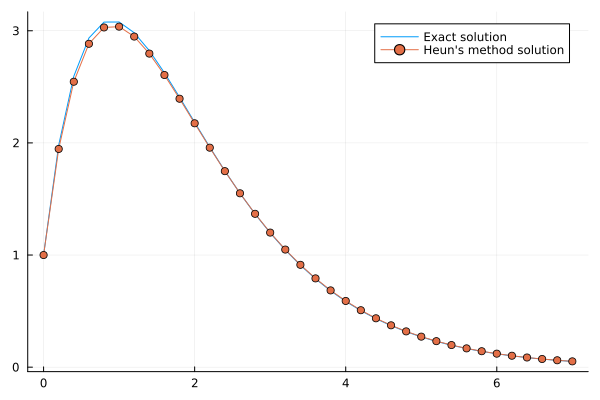

In [8]:
# Heun's method loop
for idx in 1:length(t_vals)-1
    y_p = y_vals[idx] + dt * dydt(t_vals[idx], y_vals[idx])
    y_vals[idx+1] = y_vals[idx] + (dt / 2) * (
        dydt(t_vals[idx], y_vals[idx]) +
        dydt(t_vals[idx+1], y_p)
    )
end

# Calculate the maximum error
y_exact = exact_solution.(t_vals)

println("Maximum error: ", abs(maximum(y_exact) - maximum(y_vals)))

plot(t_vals, y_exact, label="Exact solution")
plot!(t_vals, y_vals, marker=:circle, label="Heun's method solution")

Notice how the error is visibly smaller than for the Forward Euler method–the maximum error is around 0.041, which is very close to $\Delta x^2 = 0.04$.

## Runge-Kutta methods

Runge–Kutta methods are a family of methods that use one or more stages; the methods we have discussed so far (Forward Euler and Heun's) actually all fall in this family. There is also a popular fourth-order method: the **fourth-order Runge–Kutta method** (RK4). This uses four stages to get a more accurate solution:

$$
\begin{align}
y_{i+1} &= y_i + \frac{\Delta x}{6} (k_1 + 2 k_2 + 2 k_3 + k_4) \\
k_1 &= f(x_i, y_i) \\
k_2 &= f \left( x_i + \frac{\Delta x}{2}, y_i + \frac{\Delta x}{2} k_1 \right) \\
k_3 &= f \left( x_i + \frac{\Delta x}{2}, y_i + \frac{\Delta x}{2} k_2 \right) \\
k_4 &= f \left( x_i + \Delta x, y_i + \Delta x \, k_3 \right)
\end{align}
$$

This method is explicit and fourth-order accurate: error $\sim \mathcal{O}(\Delta x^4)$:

Maximum error: 0.000308437774888759


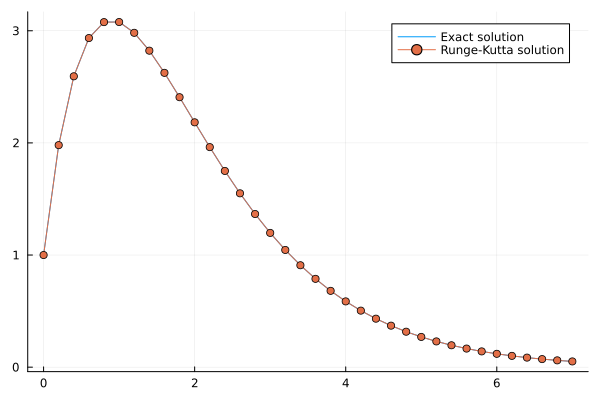

In [9]:
dt = 0.2
t_vals = 0:dt:7
y_vals = zeros(length(t_vals))

# initial condition
y_vals[1] = 1

# 4th order Runge-Kutta iteration
for idx in 1:length(t_vals)-1
    t_val = t_vals[idx]
    k1 = dydt(t_val, y_vals[idx])
    k2 = dydt(t_val + dt / 2, y_vals[idx] + dt * k1 / 2)
    k3 = dydt(t_val + dt / 2, y_vals[idx] + dt * k2 / 2)
    k4 = dydt(t_val + dt, y_vals[idx] + dt * k3)
    y_vals[idx+1] = y_vals[idx] + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6
end


println("Maximum error: ", abs(maximum(y_exact) - maximum(y_vals)))

plot(t_vals, y_exact, label="Exact solution")
plot!(t_vals, y_vals, marker=:circle, label="Runge-Kutta solution")

## Solving ODEs using Julia SciML 
Julia offers a very powerful ecosystem for solving differential equations which is called SciML. You can think of Julia's SciML as SciPy or MATLAB's standard library but in Julia. It is a collection of packages that are used to solve differential equations. The SciML ecosystem is built on top of the Julia programming language which means it is really fast and easy to use. Also it is fully compatible with machine learning and automatic differentiation (and also supports GPUs - this is a huge plus compared to other packages which often are not compatibel with machine learning libraries). An Introduction to the SciML ecosystem can be found here: https://docs.sciml.ai/Overview/stable/getting_started/getting_started/

We will use the OrdinaryDiffEq package to solve the ODEs. An introduction on how to solve differential equations using this package can be found here: https://docs.sciml.ai/DiffEqDocs/stable/getting_started/

In [10]:
using Pkg
Pkg.add("OrdinaryDiffEq")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


Lets test the SciML package on the ODE we have already solved using our own implemented solvers. We will use the same ODE as before and then call the `ODEProblem` function.
This function has the following fields

    f: The function in the ODE.
    u0: The initial condition.
    tspan: The timespan for the problem.
    p: The parameters.
    kwargs: The keyword arguments passed onto the solves. For example dt for the time step size.

Maximum error: 0.00025450216912492607


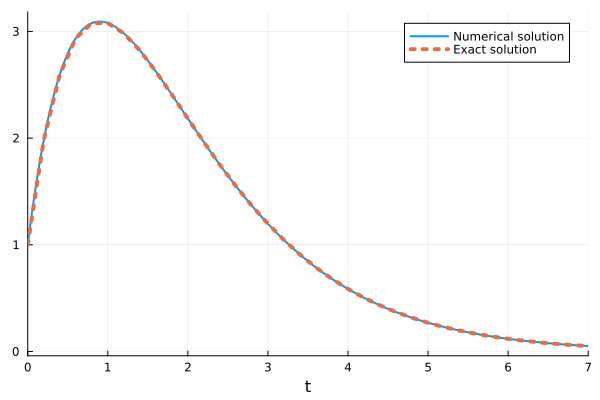

In [21]:
using OrdinaryDiffEq

# Define the function, this is the same as dydt above but reframed for the ODEProblem type
function simple_f(dy, y, p, t)
    dy[1] = 8 * exp(-t) * (1 + t) - 2 * y[1]
end

# Initial conditions
y₀ = [1.0]
tspan = (0.0, 7.0)
dt = 0.2

# Define the problem
prob = ODEProblem(simple_f, y₀, tspan, dt=dt)

# Solve the problem using the RK4 (Runge-Kutta) algorithm
sol = solve(prob, RK4())

# Calculate the maximum error
t_vals = 0:dt:7
exact_vals = exact_solution.(t_vals)
numerical_vals = [sol(t)[1] for t in t_vals]
max_error = maximum(abs.(exact_vals .- numerical_vals))

println("Maximum error: ", max_error)

# Plot the solution
plot(sol, lw=2, label="Numerical solution")
plot!(t_vals, exact_vals, lw=4, ls=:dot, label="Exact solution")


### Simple Harmonic Oscillator Problem

We will take a look at a physical example known as the Simple Harmonic Oscillator. This is a classic problem in physics that describes the motion of a mass attached to a spring. The force exerted by the spring is proportional to the displacement of the mass from its equilibrium position, but in the opposite direction. This is often referred to as Hooke's law and can be written as:

$$
F = -kx
$$

where $F$ is the force, $k$ is the spring constant, and $x$ is the displacement.

By Newton's second law, we know that $F = ma$, where $m$ is the mass and $a$ is the acceleration. Acceleration is the second derivative of the position with respect to time, so we can write this as $a = \frac{d^2x}{dt^2}$. Substituting this into the equation gives us the differential equation for the simple harmonic oscillator:

$$
m\frac{d^2x}{dt^2} = -kx
$$

or, rearranging:

$$
\frac{d^2x}{dt^2} = -\frac{k}{m}x
$$

This is a second-order ODE that describes the motion of the mass. In the case of a simple harmonic oscillator, the ratio $\frac{k}{m}$ is often replaced by $\omega^2$, where $\omega$ is the angular frequency of the oscillator.

In the following Julia code, we define the problem by implementing a `harmonicoscillator` function, which implements the second-order ODE. We also set the initial conditions for the position `x₀` and velocity `dx₀`, as well as the time span for the simulation.


#### Implementing and Solving the Harmonic Oscillator in Julia:

The Implementation of the harmonic oscillator problem and how to solve it using the `OrdinaryDiffEq` package is described here: https://docs.sciml.ai/DiffEqDocs/stable/examples/classical_physics/#Second-Order-Linear-ODE 

Consider a mass-spring system with an angular frequency of $1$ rad/s, initial displacement of $0$ m, and initial velocity of $π/2$ m/s. The ODE becomes:

In [22]:
#Parameters
ω = 1

#Initial Conditions
dt = 0.1
x₀ = [0.0]
dx₀ = [π / 2]
tspan = (0.0, 2π)

ϕ = atan((dx₀[1] / ω) / x₀[1])
A = √(x₀[1]^2 + dx₀[1]^2)

#Define the problem
function harmonicoscillator(ddu, du, u, ω, t)
    ddu .= -ω^2 * u
end

harmonicoscillator (generic function with 1 method)

Now we pass our `harmonicoscillator` function to the `SecondOrderODEProblem` function toegteher with arguments for the initial conditions and the time span. We will also define a solver. As a starting point we add `Euler()` as a solver. Since this is a discrete solver we also need to define a step size. We will use a step size of 0.5. Note that this stepsize is passen to the  `SecondOrderODEProblem` function not the `solve` function.

We will notice that this solver is not very accurate. The error is quite large. This is because the Euler method is a first order method. In general there are different ways to improve the results. One way is to reduce the step size. This will however increase the computational cost. Another way is to use a better (higher order) solver. You can try to use a different solver and see if you can reduce the error. 

### Task: Add a another solver and try to reduce the error 

You can find a list of solvers here: https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/ 

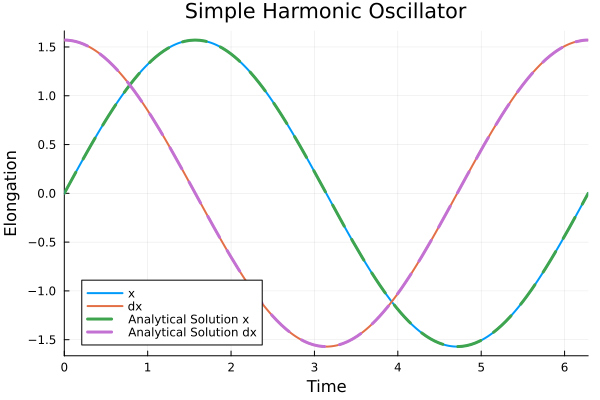

In [24]:
#Pass to solvers
prob = SecondOrderODEProblem(harmonicoscillator, dx₀, x₀, tspan, ω, dt=dt)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

#Plot
plot(sol, vars=[2, 1], linewidth=2, title="Simple Harmonic Oscillator",
    xaxis="Time", yaxis="Elongation", label=["x" "dx"])
plot!(t -> A * cos(ω * t - ϕ), lw=3, ls=:dash, label="Analytical Solution x")
plot!(t -> -A * ω * sin(ω * t - ϕ), lw=3, ls=:dash, label="Analytical Solution dx")

If we consider a mass-spring system with an angular frequency of 1 rad/s, initial displacement of 2 m, and initial velocity of 0.0 m/s. The ODE becomes:

In [27]:
using OrdinaryDiffEq, Plots
#Parameters
ω = 2

#Initial Conditions
x₀ = [2.0]
dx₀ = [0.0] # [π / 2]
tspan = (0.0, 2π)

ϕ = atan((dx₀[1] / ω) / x₀[1])
A = √(x₀[1]^2 + dx₀[1]^2)

#Define the problem
function harmonicoscillator_2(ddu, du, u, ω, t)
    ddu .= -ω^2 * u
end


harmonicoscillator_2 (generic function with 1 method)

You can try your solver on this ODE as well.

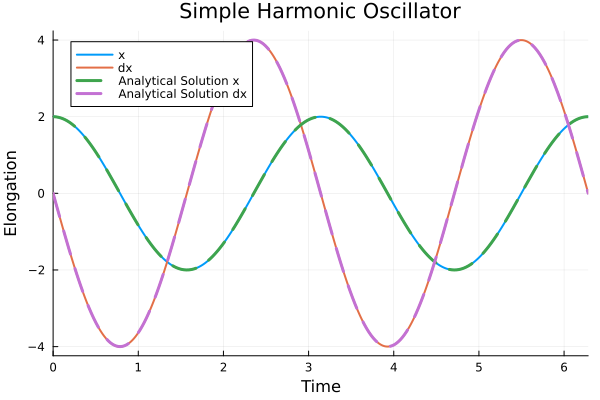

In [28]:
#Pass to solvers
prob_2 = SecondOrderODEProblem(harmonicoscillator_2, dx₀, x₀, tspan, ω)
sol_2 = solve(prob_2, RK4()) # Add the solver here

#Plot
plot(sol_2, vars=[2, 1], linewidth=2, title="Simple Harmonic Oscillator",
    xaxis="Time", yaxis="Elongation", label=["x" "dx"])
plot!(t -> A * cos(ω * t - ϕ), lw=3, ls=:dash, label="Analytical Solution x")
plot!(t -> -A * ω * sin(ω * t - ϕ), lw=3, ls=:dash, label="Analytical Solution dx")